# 가설 세우기
서울 강남 3구(강남구, 서초구, 송파구)는 안전한가?


In [1]:
CCTV_FILE = "01. CCTV_in_Seoul.csv"
POP_FILE = "01. population_in_Seoul.xls"

In [2]:
import pandas as pd
df_cctv = pd.read_csv(CCTV_FILE)

In [3]:
df_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
df_cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


## 컬럼 정의

In [5]:
df_cctv = df_cctv.rename(columns={"기관명":"구별"})
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 엑셀 파일 불러오기

In [6]:
!pip install xlrd==1.2.0

In [7]:
# 위에 두 칸 제거하고 그 밑부터 가져오기
df_pop_seoul = pd.read_excel(POP_FILE, header = 2, usecols="B, D, G, J, N")
df_pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
df_pop_seoul.columns = ["구별", "인구수", "한국인", "외국인", "고령자"]
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 데이터 살펴보기

## CCTV 데이터 살펴보기

In [9]:
# CCTV가 많은 순으로 정렬
df_cctv.sort_values(by="소계", ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


In [10]:
# 최근 3년치 CCTV 개수가 증가한 "최근증가율"을 구해 보기 - (2014+2015+2016)/2013
df_cctv["최근증가율"]=(df_cctv["2014년"]+df_cctv["2015년"]+df_cctv["2016년"])/df_cctv["2013년도 이전"]*100
df_cctv

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780
5,광진구,707,573,78,53,174,53.228621
6,구로구,1561,1142,173,246,323,64.973730
7,금천구,1015,674,51,269,354,100.000000
8,노원구,1265,542,57,451,516,188.929889
9,도봉구,485,238,159,42,386,246.638655


In [11]:
df_cctv.sort_values(by="최근증가율", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 인구 데이터 살펴 보기

In [12]:
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
df_pop_seoul = df_pop_seoul.drop(0, axis=0)
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [14]:
df_pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [15]:
df_pop_seoul.isnull().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [16]:
df_pop_seoul = df_pop_seoul.dropna(axis=0, how="any")
df_pop_seoul.isnull().sum()

구별     0
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64

In [17]:
# 인구 수 데이터에 추가적인 데이터 생성

df_pop_seoul["외국인비율"] = df_pop_seoul["외국인"]/df_pop_seoul["인구수"]*100
df_pop_seoul["고령자비율"] = df_pop_seoul["고령자"]/df_pop_seoul["인구수"]*100

df_pop_seoul.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [18]:
# 외국인 수, 외국인 비율로 정렬

df_pop_seoul.sort_values(by="외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [19]:
df_pop_seoul.sort_values(by="외국인비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


# CCTV 데이터와 인구 현황 데이터를 합치기

In [20]:
data_result = pd.merge(df_cctv, df_pop_seoul, on="구별", how="inner")
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [21]:
# 필요 없는 컬럼 삭제

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# CCTV 소계와 상관관계 살펴보기

In [22]:
import numpy as np

In [23]:
# 고량자 비율 - 소계
np.corrcoef(data_result["고령자비율"],data_result["소계"])[0, 1]

-0.28078553790050065

In [24]:
# 외국인비율 - 소계
np.corrcoef(data_result["외국인비율"],data_result["소계"])[0, 1]

-0.13607432878194445

In [25]:
# 인구수 - 소계
np.corrcoef(data_result["인구수"],data_result["소계"])[0, 1]

0.30634227936792635

인구 수와 소계가 가장 관련이 있다

# 시각화

In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and di

In [26]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [27]:
import seaborn as sns

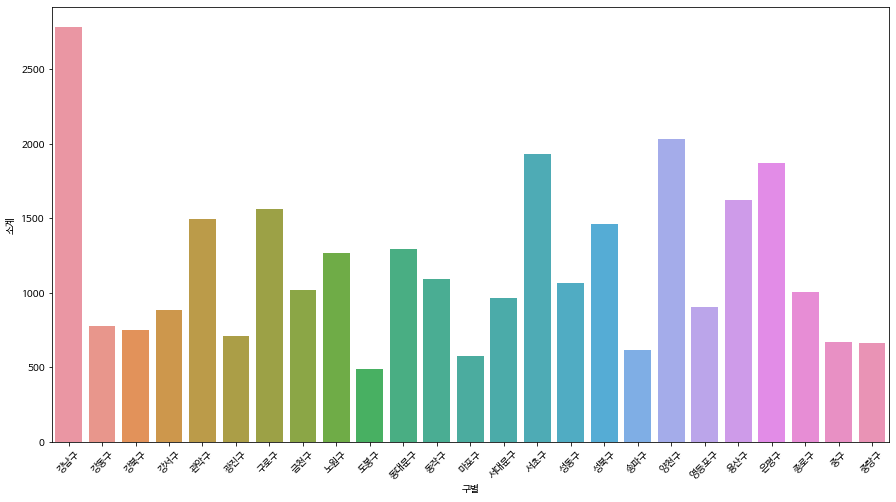

In [28]:
plt.figure(figsize=(15, 8))
sns.barplot(data=data_result, x="구별", y="소계")
plt.xticks(rotation=45)
plt.show()

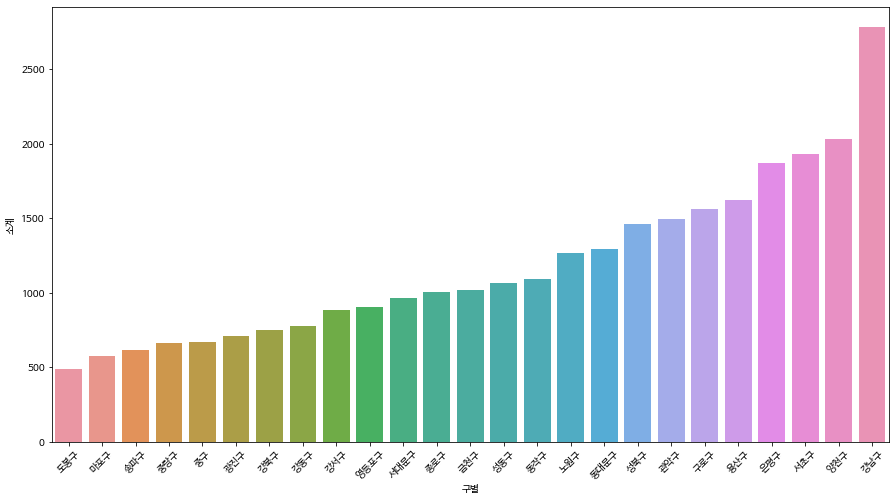

In [29]:
# 소계를 기준으로 정렬해서 확인

plt.figure(figsize=(15, 8))
sns.barplot(data=data_result.sort_values(by="소계"), x="구별", y="소계")
plt.xticks(rotation=45)
plt.show()

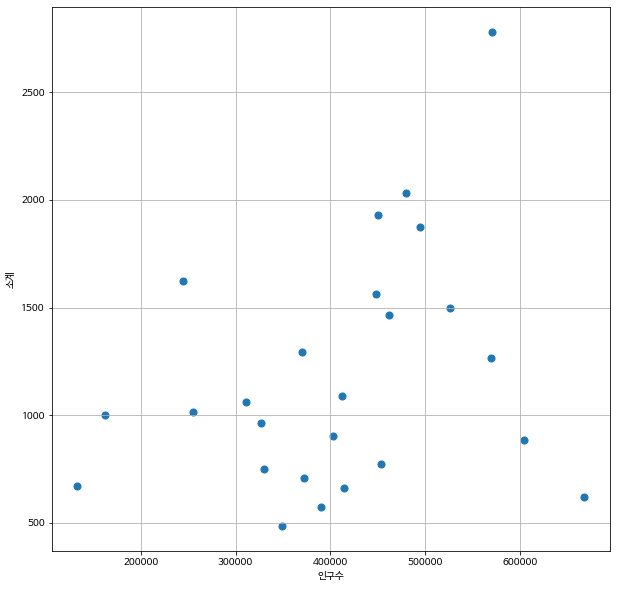

In [30]:
# 산점도를 이용해서 인구 수, 소계 시각화

plt.figure(figsize=(10, 10))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.ylabel("소계")
plt.grid()
plt.show()

- `np.polyfit(x, y, dim)`
  - `x` : `x` 축에 들어갈 데이터 $y=f(x)$에서 $x$를 의미
  - `y` : `x` 축의 기울기와 절편을 구할 기준 데이터 ($x$의 결과물 $y$)
  - `dim` : 차수( 1이면 1차식 $y=ax+b$ )

In [31]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)

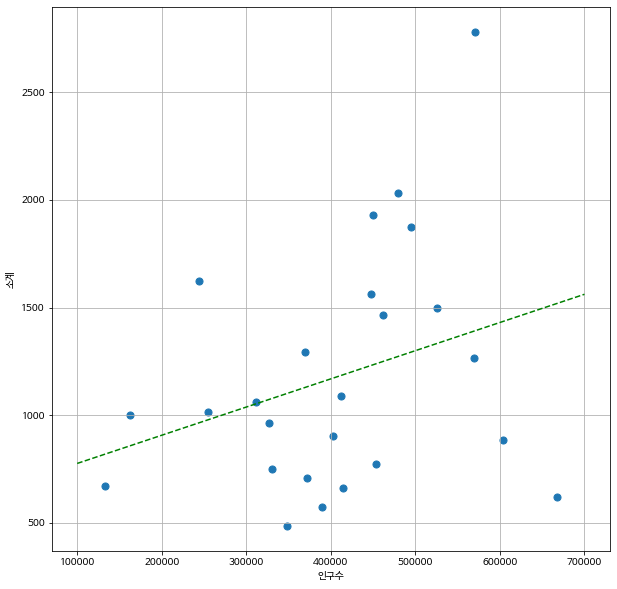

In [32]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 그래프 사이즈 조절
plt.figure(figsize=(10, 10))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)

line = f1(fx)
plt.plot(fx, line, color='g', linestyle='--')

plt.xlabel("인구수")
plt.ylabel("소계")
plt.grid()
plt.show()

인구 수와 적정 CCTV가 차이가 많이 나는 구 순으로 정렬

In [33]:
# np.abs : 절대값 np.abs(1) : 1 / np.abs(-1) : 1
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수'])) # 그냥 인구수를 빼는게 아닌, 인구수 데이터가 실제로 들어 갔을 때


# 오차 내림차순으로 정렬
df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort.head(10)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
17,송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,900.911312
18,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,760.563512
14,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,695.403794
20,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,659.231690
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,616.501341
12,마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,581.180999
21,은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,580.698457
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,551.503155
24,중랑구,660,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,527.718965


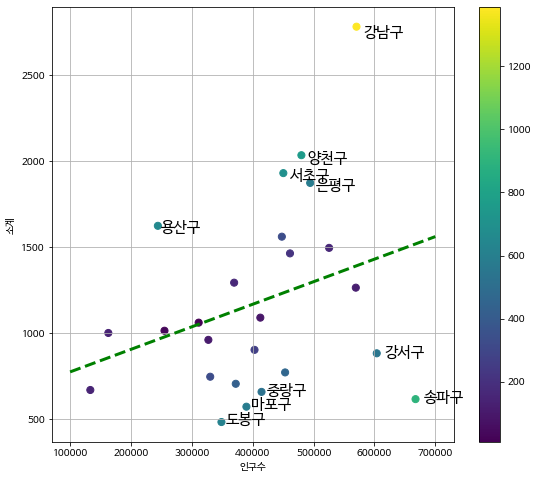

In [34]:
df_sort = df_sort.set_index("구별")

plt.figure(figsize=(9, 8))
plt.scatter(df_sort['인구수'], df_sort['소계'], c=df_sort['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 오차가 가장 큰 10개의 구에 대해서 텍스트를 부여
for n in range(10):
  # scatter가 찍힌 좌표를 기준으로 약간 오른쪽( 인구수보다 약간 큼 ) 아래 ( 소계 보다 약간 작음 )
  plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel("인구수")
plt.ylabel("소계")

plt.colorbar()
plt.grid()
plt.show()